In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# from catboost import CatBoostRegressor, Pool

In [10]:
all_data = pd.read_csv('./data/final_2022_125.csv')

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125370 entries, 0 to 125369
Data columns (total 20 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   1        125370 non-null  int64  
 1   2        125370 non-null  object 
 2   dt       125370 non-null  object 
 3   id       125370 non-null  object 
 4   age      125370 non-null  int64  
 5   person   87740 non-null   object 
 6   address  69793 non-null   object 
 7   porod    115018 non-null  object 
 8   type     125098 non-null  object 
 9   stat     120171 non-null  object 
 10  diag     122398 non-null  object 
 11  result   125283 non-null  object 
 12  state    125313 non-null  object 
 13  base     125362 non-null  object 
 14  first    125370 non-null  object 
 15  last     124960 non-null  object 
 16  hour     125370 non-null  float64
 17  month    125370 non-null  int64  
 18  weekday  125370 non-null  int64  
 19  week     125370 non-null  int64  
dtypes: float64(1), int64(5), o

In [14]:
all_data.head(20)

,1,2,dt,id,age,person,address,porod,type,stat,diag,result,state,base,first,last,hour,month,weekday,week
0,3,01-2020,2020-01-01,8(8),26,"родственник, проживающий совместно с больным",NaN,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,"оказана помощь, больной оставлен на месте","ГБУЗ НО ""Городская поликлиника №7"" (ул. Верхне...",ПСМП №7,09:46:15,09:52:22,9.0,1,3,1
1,74,01-2020,2020-01-01,92(92),0,"родственник, проживающий совместно с больным",NaN,"Температура, ребенок >1 года, других жалоб нет",Первичный,внезапное заболевание,ОРВИ. Гипертермический синдром,отказ от транспортировки для госпитализации в ...,"ГБУЗ НО ""Детская городская поликлиника №22"" (у...",ПСМП №7,23:32:28,23:34:27,23.0,1,3,1
2,63,01-2020,2020-01-01,87(87),61,"родственник, проживающий совместно с больным",NaN,"Высокое ад, головная боль, тошнота, рвота",Первичный,неотложное состояние,Гипертоническая болезнь. Гипертонический криз.,"оказана помощь, больной оставлен на месте","ГБУЗ НО ""Городская поликлиника №7"" (ул. Турген...",ПСМП №7,22:41:22,22:41:38,22.0,1,3,1
3,57,01-2020,2020-01-01,77(77),15,"родственник, проживающий совместно с больным",NaN,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,отказ от транспортировки для госпитализации в ...,"ГБУЗ НО ""Детская городская поликлиника №48"" (у...",ПСМП №7,21:15:31,21:26:15,21.0,1,3,1
4,51,01-2020,2020-01-01,69(69),24,"родственник, проживающий совместно с больным",NaN,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,отказ от транспортировки для госпитализации в ...,"ГБУЗ НО ""Городская клиническая больница №34"" П...",ПСМП №7,19:59:30,20:11:02,19.0,1,3,1
5,45,01-2020,2020-01-01,66(66),80,"родственник, проживающий совместно с больным",NaN,"Констатация, умер",Первичный,неотложное состояние,NaN,смерть до приезда бригады СМП,"ГБУЗ НО ""Городская поликлиника №30"" (ул. Адмир...",ПСМП №7,19:28:54,19:38:21,19.0,1,3,1
6,9,01-2020,2020-01-01,16(16),68,больной или пострадавший,"г.Нижний Новгород, ш. Казанское, д.9, кв***",Болит живот (взрослый),Первичный,неотложное состояние,Люмбалгия,"оказана помощь, больной оставлен на месте","ГБУЗ НО ""Городская поликлиника №7"" (ул. Верхне...",ПСМП №7,10:56:11,10:58:39,10.0,1,3,1
7,33,01-2020,2020-01-01,51(51),12,больной или пострадавший,"г.Нижний Новгород, ул. Ванеева, д.108, кв***",NaN,Первичный,внезапное заболевание,Кишечная инфекция,отказ от транспортировки для госпитализации в ...,"ГБУЗ НО ""Детская городская поликлиника №48"" (у...",ПСМП №7,17:34:02,18:06:46,17.0,1,3,1
8,27,01-2020,2020-01-01,29(29),79,больной или пострадавший,"г.Нижний Новгород, ул. Богдановича, д.1, кв.***",Болит живот (взрослый),Первичный,неотложное состояние,Гастрит,"оказана помощь, больной оставлен на месте","ГБУЗ НО ""Городская поликлиника №7"" (ул. Верхне...",ПСМП №7,13:54:14,14:08:03,13.0,1,3,1
9,21,01-2020,2020-01-01,28(28),8,"родственник, проживающий совместно с больным",NaN,Болит живот (ребенок),Первичный,внезапное заболевание,Другие болезни желчевыводящих путей,"оказана помощь, больной оставлен на месте","ГБУЗ НО ""Детская городская поликлиника №22"" (у...",ПСМП №7,13:45:38,13:53:13,13.0,1,3,1


In [ ]:
# all_data[all_data.nomer == "92(92)"]

In [17]:
all_data['dt'] = pd.to_datetime(all_data['dt'])

all_data['nomer1'] = pd.to_numeric(all_data['id'].str.split('(').str[0], errors='coerce')
all_data['nomer2'] = pd.to_numeric(all_data['id'].str.split('(').str[1].str.replace(')', ''), errors='coerce')
# all_data['age'] = pd.to_numeric(all_data['age'].str.split().str[0], errors='coerce')

all_data['first'] = pd.to_datetime(all_data['first'], errors='coerce')
all_data['last'] = pd.to_datetime(all_data['last'], errors='coerce')
all_data['time_exp'] =  all_data['last'] - all_data['first']
# all_data['hour'] = all_data['first'].dt.hour

all_data['first'] = pd.to_datetime(all_data['first'],format= '%H:%M:%S' ).dt.time
all_data['last'] = pd.to_datetime(all_data['last'],format= '%H:%M:%S' ).dt.time

all_data['address1'] = all_data['address'].str.split('.').str[0].str.replace('"','') # locality type
all_data['address2'] = all_data['address'].str.split('.').str[1].str.split(' ').str[0] # town name
all_data['address3'] = all_data['address'].str.split('ул.').str[1] # street, home, n apartment # нужно почистить если хотим какой-то geo api использовать

In [22]:
len(all_data['person'].unique()) # Можно сделать категориальным, но для catboost смысла нет

17

In [23]:
all_data['person'].value_counts()

родственник, проживающий совместно с больным          55165
больной или пострадавший                              24414
родственник, проживающий отдельно                      3138
соседи                                                 1344
сотрудник МЧС (пожарной охраны)                        1137
очевидец происшествия                                   685
участковый врач                                         472
сотрудник администрации, ЖЭКа, социальный работник      331
бригада                                                 266
средний медицинский работник ЛПУ                        215
сотрудник полиции                                       187
прохожий                                                111
сотрудник ССМП                                          106
врач стационара                                          71
не представился (вызывающий не установлен)               70
врач приемного отделения                                 28
Name: person, dtype: int64

In [24]:
len(all_data['porod'].unique()) # Тоже можно категориальным

174

In [83]:
all_data['porod'].value_counts()

Температура, взрослый                                                           15951
Высокое ад, головная боль, тошнота, рвота                                        9229
Температура 38-39, ребёнок >1 года, других жалоб нет                             8626
Болит живот (взрослый)                                                           5904
Боль в груди (колющая,ноющая и пр.) без других жалоб                             5055
                                                                                ...  
У ребёнка >1 тошнота, однократная рвота, жидкий стул 1-2 раза без доп. жалоб        1
Головокружение, не впервые возникшее, ухудшение у пациента после онмк               1
Дежурство в зоне угрозы чс                                                          1
Прием медикаметов ребенком без назначения                                           1
Ожог (химический), ребенок                                                          1
Name: porod, Length: 173, dtype: int64

In [ ]:
# all_data[~all_data['porod'].isna() & all_data['porod'].str.find('covid') != -1.0]

In [84]:
len(all_data['type'].unique()) # Кат

8

In [87]:
len(all_data['stat'].unique())  # Кат

7

In [88]:
len(all_data['diag'].unique())

1012

In [89]:
len(all_data['result'].unique())

23

In [91]:
len(all_data['state'].unique()) # Довольно много, мб одни и теже написанные по разному

152

In [93]:
all_data['state'].value_counts()

ГБУЗ НО "Городская клиническая больница №12" Поликлиника                      5635
ГБУЗ НО "Городская поликлиника №1" (пл. Маршала Жукова)                       5209
Поликлиника №2 Городская больница №2, пр-кт. Циолковского  г. Дзержинск       4377
ГБУЗ НО "Городская больница №37" Поликлиника пр-кт Ленина                     4305
ГБУЗ НО "Городская больница №37" Поликлиника пр-кт Кирова                     4305
                                                                              ... 
Институт травматологии ФГБОУ ВО "ПИМУ" Минздрава России поликлиника              1
ГБУЗ НО "Воскресенская центральная районная больница" поликлиника                1
ГБУЗ НО "Городская поликлиника №50" Травмпункт                                   1
ГБУЗ НО "Нижегородская областная детская клиническая больница" Поликлиника       1
ГБУЗ НО "Варнавинскаяцентральная районная больница" поликлиника                  1
Name: state, Length: 151, dtype: int64

In [94]:
len(all_data['base'].unique()) # Ok

52

In [95]:
all_data['base'].value_counts()
;

''

In [96]:
all_data['year'] = all_data['dt'].dt.year
# all_data['month'] = all_data['dt'].dt.month
# all_data['week'] = all_data['dt'].dt.week
# all_data['dayofweek'] = all_data['dt'].dt.dayofweek
all_data['date_time'] = pd.to_datetime(all_data['dt'].astype(str)+' '+all_data['first'].astype(str))

In [97]:
from datetime import date
import holidays
holidays_ru = holidays.RU()

all_data['holiday'] = all_data['dt'].apply(lambda x: holidays_ru.get(x))

In [100]:
all_data.groupby([all_data['date_time'].dt.date, all_data['date_time'].dt.hour])['dt'].transform('count') # Вызовов в час
all_data.groupby(['dt'])['id'].transform('count') # Вызовов в день
all_data.groupby(['year', 'month'])['id'].transform('count') # Вызовов в месяц
all_data.groupby(['base', 'year', 'month'])['id'].transform('count') # Вызовов в месяц по станции
all_data.groupby(['year', 'month','diag'])['diag'].transform('count') # Количество по диагнозу за месяц

0         234.0
1         234.0
2          63.0
3         234.0
4         234.0
          ...  
125365    258.0
125366     12.0
125367     71.0
125368    266.0
125369     33.0
Name: diag, Length: 125370, dtype: float64

In [101]:
all_data[all_data.base=='ПСМП №3'].groupby(['base' ,'year', 'month'])['id'].count()

base     year  month
ПСМП №3  2020  1        208
               2         47
               3         81
               4        542
               5        536
               6        518
               7        404
               8        377
               9        408
               10         4
               11        48
               12       823
         2021  1        789
               2        616
               3        708
               4        608
               5        505
               6        218
               7        561
               8        468
               9        523
               10       174
               11       649
               12       654
         2022  1        749
               2        767
               3        580
               5        210
Name: id, dtype: int64

<AxesSubplot:xlabel='base,year,month'>

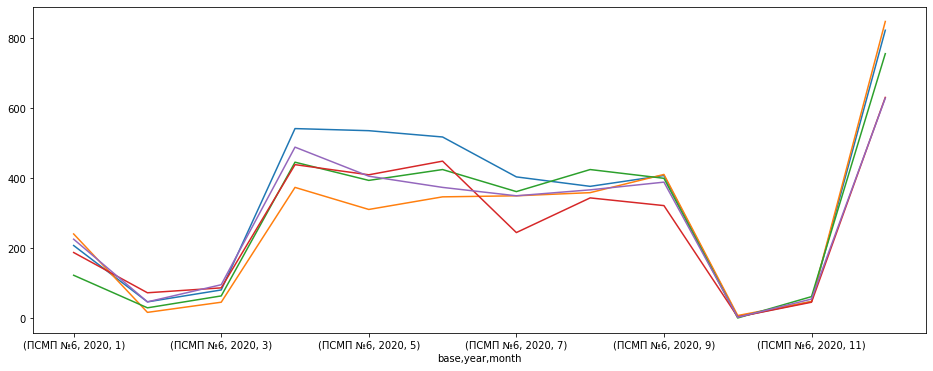

In [102]:
plt.figure(figsize=(16, 6))
all_data[(all_data.base=='ПСМП №3') & (all_data.year==2020)].groupby(['base' ,'year', 'month'])['id'].count().plot()
all_data[(all_data.base=='ПСМП №7') & (all_data.year==2020)].groupby(['base' ,'year', 'month'])['id'].count().plot()
all_data[(all_data.base=='ПСМП №5') & (all_data.year==2020)].groupby(['base' ,'year', 'month'])['id'].count().plot()
all_data[(all_data.base=='ПСМП №1') & (all_data.year==2020)].groupby(['base' ,'year', 'month'])['id'].count().plot()
all_data[(all_data.base=='ПСМП №6') & (all_data.year==2020)].groupby(['base' ,'year', 'month'])['id'].count().plot()

<AxesSubplot:title={'center':'по дням'}, xlabel='base,dt'>

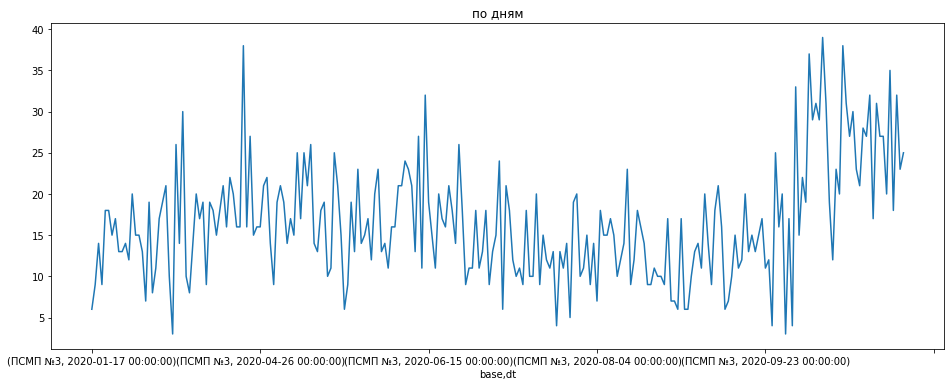

In [103]:
plt.figure(figsize=(16, 6))
all_data[(all_data.base=='ПСМП №3') & (all_data.year==2020)].groupby(['base' ,'dt'])['id'].count().plot(title="по дням")

In [104]:
all_data[all_data.year != 2022].groupby(['month'])['id'].count().sort_values(ascending=False) # Вызовы по месяцам

month
12    14830
9      9732
5      8902
11     8817
4      8799
7      8721
8      8456
1      8309
3      6755
2      6383
6      5473
10     1958
Name: id, dtype: int64

In [105]:
all_data.groupby(['base'])['id'].count().sort_values(ascending=False) # Вызовы по ПСМП 

base
ПСМП №3                           12775
ПСМП №7                           11872
ПСМП №1                           11478
ПСМП №5                           11033
ПСМП №6                            9965
ПСМП №9                            9422
ПСМП №8                            8777
ПСМП №4                            7836
ПСМП №2                            6819
БСМП г. Дзержинск Юго-Западная     6734
БСМП г. Дзержинск Центральная      4824
Кстовская ЦРБ                      3883
Борская ЦРБ                        3831
Володарская ЦРБ                    2362
Арзамасская РБ                     1567
Семеновская ЦРБ                    1432
Володарская ЦРБ Ильиногорская      1427
БСМП г. Арзамас                    1415
Выксунская ЦРБ                     1170
Павловская ЦРБ                     1059
Чкаловская ЦРБ                      834
Лысковская ЦРБ                      769
Перевозская ЦРБ                     586
Городецкая ЦРБ                      527
Кулебакская ЦРБ                    

In [106]:
all_data.groupby(['dt'])['id'].count().rolling(3).mean() # Скользащее среднее

dt
2020-01-01           NaN
2020-01-02           NaN
2020-01-03      9.000000
2020-01-04      5.666667
2020-01-05      6.666667
                 ...    
2022-05-06    194.666667
2022-05-07    192.333333
2022-05-08    221.666667
2022-05-09    224.333333
2022-05-10    209.000000
Name: id, Length: 682, dtype: float64

In [ ]:
Погода

In [107]:
# open weather
weather_2020 = pd.read_csv('./weather_data/27553.01.01.2020.31.12.2020.1.0.0.en.utf8.00000000.csv', skiprows=6, sep=';')
weather_2021 = pd.read_csv('./weather_data/27553.01.01.2021.31.12.2021.1.0.0.en.utf8.00000000.csv', skiprows=6, sep=';')
weather_2022 = pd.read_csv('./weather_data/27553.01.01.2022.31.05.2022.1.0.0.en.utf8.00000000.csv', skiprows=6, sep=';')

weather_2020.head(2)

,Local time in Nizhny Novgorod (airport),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
31.12.2020 21:00,-4.0,761.6,769.2,NaN,90,Wind blowing from the south-southeast,3,4.0,7.0,100%.,State of sky on the whole unchanged. Diameter...,Rain.,Cloud covering more than 1/2 of the sky throug...,NaN,NaN,Stratocumulus other than Stratocumulus cumulog...,100%.,300-600,NaN,NaN,10.0,-5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31.12.2020 18:00,-3.6,761.7,769.3,NaN,92,Wind blowing from the south-southeast,3,6.0,7.0,100%.,State of sky on the whole unchanged. Diameter...,Rain.,Cloud covering more than 1/2 of the sky throug...,NaN,-3.6,Stratocumulus other than Stratocumulus cumulog...,100%.,300-600,NaN,NaN,10.0,-4.7,1.0,12.0,NaN,NaN,NaN,NaN,NaN


In [108]:
weather_2020['dt'] = pd.to_datetime(weather_2020.index)
weather_2021['dt'] = pd.to_datetime(weather_2021.index)
weather_2022['dt'] = pd.to_datetime(weather_2022.index)
max_temp_by_day_2020 = weather_2020.groupby(weather_2020['dt'].dt.date)['Local time in Nizhny Novgorod (airport)'].max()
max_temp_by_day_2021 = weather_2021.groupby(weather_2020['dt'].dt.date)['Local time in Nizhny Novgorod (airport)'].max()
max_temp_by_day_2022 = weather_2022.groupby(weather_2020['dt'].dt.date)['Local time in Nizhny Novgorod (airport)'].max()

In [109]:
weather_2020.groupby(weather_2020['dt'].dt.date)['Local time in Nizhny Novgorod (airport)'].max() - weather_2020.groupby(weather_2020['dt'].dt.date)['Local time in Nizhny Novgorod (airport)'].min()
weather_2020.groupby(weather_2020['dt'].dt.date)['Local time in Nizhny Novgorod (airport)'].std()

dt
2020-01-01    1.942017
2020-01-02    0.771710
2020-01-03    3.250494
2020-01-04    2.421186
2020-01-05    2.802040
                ...   
2020-12-27    1.028088
2020-12-28    1.919821
2020-12-29    0.846280
2020-12-30    1.612452
2020-12-31    1.216553
Name: Local time in Nizhny Novgorod (airport), Length: 366, dtype: float64

In [110]:
max_temp_by_day_2020.rename('MaxTemp', inplace=True)
max_temp_by_day_2021.rename('MaxTemp', inplace=True)
max_temp_by_day_2022.rename('MaxTemp', inplace=True)
;

''

In [111]:
max_temp_by_day = pd.concat([max_temp_by_day_2020, max_temp_by_day_2021, max_temp_by_day_2022])

In [287]:
all_data.set_index('dt').join(max_temp_by_day).reset_index() #

,dt,nomer,age,reson,address,porod,type,type.1,diag,result,move,base,first,last,nomer1,nomer2,time_exp,hour,address1,address2,address3,month,week,dayofweek,date_time,holiday,year,MaxTemp
0,2020-01-01,16(16),68.0,"больной или пострадавший,","""г.Нижний Новгород, ш. Казанское, д.9, кв***"",",Болит живот (взрослый),Первичный,неотложное состояние,Люмбалгия,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Городская поликлиника №7"""" (ул. Вер...",ПСМП №7,10:56:00,10:58:00,16.0,16.0,0 days 00:02:00,10,г,Нижний,NaN,1,1,2,2020-01-01 10:56:00,Новый год,2020,0.7
1,2020-01-01,29(29),79.0,"больной или пострадавший,","""г.Нижний Новгород, ул. Богдановича, д.1, кв.*...",Болит живот (взрослый),Первичный,неотложное состояние,Гастрит,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Городская поликлиника №7"""" (ул. Вер...",ПСМП №7,13:54:00,14:08:00,29.0,29.0,0 days 00:14:00,13,г,Нижний,"Богдановича, д.1, кв.***"",",1,1,2,2020-01-01 13:54:00,Новый год,2020,0.7
2,2020-01-01,52(52),11.0,"больной или пострадавший,","""г.Нижний Новгород, ул. Героя Быкова, д.9, к***"",","""Температура 38-39","других жалоб нет""",Первичный,ОРВИ. Гипертермический синдром,отказ от транспортировки для госпитализации в ...,"""ГБУЗ НО """"Детская городская поликлиника №48""""...",ПСМП №7,17:34:00,17:45:00,52.0,52.0,0 days 00:11:00,17,г,Нижний,"Героя Быкова, д.9, к***"",",1,1,2,2020-01-01 17:34:00,Новый год,2020,0.7
3,2020-01-02,113(113),83.0,"больной или пострадавший,","""г.Нижний Новгород, ул. Родионова, д.165, корп...",Задыхается (нарушение сердечного ритма),Первичный,внезапное заболевание,Гипертоническая болезнь,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Городская поликлиника №7"""" (ул. Тур...",ПСМП №7,06:52:00,07:07:00,113.0,113.0,0 days 00:15:00,6,г,Нижний,"Родионова, д.165, корп.8, кв***"",",1,1,3,2020-01-02 06:52:00,Новый год,2020,-0.3
4,2020-01-04,368(109),81.0,"больной или пострадавший,","""г.Нижний Новгород, ул. Надежды Сусловой, д.3,...","""Боль в груди (колющая",Вызов,Вид,Дисциркуляторная энцефалопатия,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Городская поликлиника №30"""" (ул. Ад...",ПСМП №7,03:08:00,03:23:00,368.0,109.0,0 days 00:15:00,3,г,Нижний,"Надежды Сусловой, д.3, корп.2, к***"",",1,1,5,2020-01-04 03:08:00,Новый год,2020,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35366,2022-05-24,30547(187),75.0,"больной или пострадавший,","""г.Дзержинск, б-р. Космонавтов, д.1/77, кв.***"",",Повышение ад без признаков криза,Первичный,неотложное состояние,Эссенциальная гипертензия (первичная),"""оказана помощь, больной оставлен на месте"",","""Поликлиника №2 Городская больница №2",Подстанция,00:40:00,00:45:00,30547.0,187.0,0 days 00:05:00,0,г,"Дзержинск,",NaN,5,21,1,2022-05-24 00:40:00,None,2022,3.1
35367,2022-05-24,6025(4),78.0,"""родственник, проживающий отдельно"",","""с.Трофимово, ул. М.Горького, д.89"",","""Задыхается",Вызов,Вид,Бронхиальная астма,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Лысковская центральная районная бол...",Лысковская ЦРБ,11:08:00,11:13:00,6025.0,4.0,0 days 00:05:00,11,с,"Трофимово,","М.Горького, д.89"",",5,21,1,2022-05-24 11:08:00,None,2022,3.1
35368,2022-05-24,14400(5),64.0,"больной или пострадавший,","""с.Большая Ельня, ул. Школьная, д.11"",","""Боль в груди (удушье",Вызов,Вид,Гипертоническая болезнь,"""оказана помощь, больной оставлен на месте"",","""ГБУЗ НО """"Кстовская центральная районная боль...",Кстовская ЦРБ,08:51:00,09:16:00,14400.0,5.0,0 days 00:25:00,8,с,Большая,"Школьная, д.11"",",5,21,1,2022-05-24 08:51:00,None,2022,3.1
35369,2022-05-24,4623(23),64.0,"больной или пострадавший,","""с.Чернуха, ул. Ленина, д.182, кв***"",",Повышение ад без признаков криза,Первичный,неотложное состояние,Артериальная гипертензия,"""оказана помощь, больной оставлен на месте"",",Арзамасская районная больница «ЧУБ»,Арзамасская РБ,00:05:00,00:10:00,4623.0,23.0,0 days 00:05:00,0,с,"Чер

NaN's

In [112]:
# check nan's # Почти нету
for column in all_data.columns:
    if all_data[column].isnull().values.any():
        print(f'{column} has nan values')

person has nan values
address has nan values
porod has nan values
type has nan values
stat has nan values
diag has nan values
result has nan values
state has nan values
base has nan values
last has nan values
nomer1 has nan values
nomer2 has nan values
time_exp has nan values
address1 has nan values
address2 has nan values
address3 has nan values
holiday has nan values


In [113]:
sum(all_data['age'].isna()) # Заменить на среднее?

0

In [ ]:
geocoder api - находит улицу, но не дом и работает не совсеми, иногда выдает что-то находящееся очень далеко,
села в большинстве не находит

In [395]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="eda_fe")
all_data['address_for_geo'] = all_data['address'].str.split(',').str[:2].str.join('').str[3:]

In [394]:
# address_string = all_data.loc[76, 'address_for_geo']
address_string = 'Чернуха ул. Ленина'

location = geolocator.geocode(address_string)
print(location.address)
print((location.latitude, location.longitude))

улица Ленина, Чернуха, Чернухинский сельсовет, Арзамасский район, Нижегородская область, Приволжский федеральный округ, 607210, Россия
(55.5971229, 43.7509914)


In [398]:
all_data.loc[76, 'address_for_geo']

'Нижний Новгород ул. Космическая'